In [49]:
print("Hello world")

Hello world


# Imports and Load Data

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
import warnings
warnings.filterwarnings('ignore')

In [52]:
df = pd.read_csv("data.csv",encoding="windows-1251")
df.head() #take a look on top of the dataset

,job_title,hh_title,age,salary,exp. period,title of exp.
0,data analyst,Data analyst,22.0,NaN,2.67,Data Analyst
1,data analyst,Data Analyst,21.0,NaN,0.83,Junior Data Analyst
2,data analyst,Data Analyst,30.0,NaN,7.50,Data Analyst
3,data analyst,Data Analyst,24.0,NaN,4.92,Data Analyst
4,data analyst,Data Analyst,27.0,450000.0,3.25,Business Intelligence Analyst


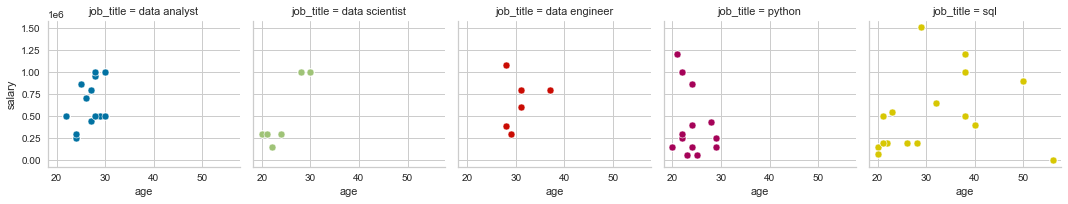

In [53]:
grid = sns.FacetGrid(df, col = 'job_title', hue = 'job_title') #visualize data
grid.map(sns.scatterplot, 'age', 'salary')

# Clean and Prepare the data

In [54]:
df_an = df.loc[(df['job_title'] == 'data analyst')]

df_an['age'].fillna((df_an['age'].mean()), inplace=True)
df_an['salary'].fillna((df_an['salary'].mean()), inplace=True)

df_ds = df.loc[(df['job_title'] == 'data scientist')]

df_ds['age'].fillna((df_ds['age'].mean()), inplace=True)
df_ds['salary'].fillna((df_ds['salary'].mean()), inplace=True)

df_en = df.loc[(df['job_title'] == 'data engineer')]

df_en['age'].fillna((df_en['age'].mean()), inplace=True)
df_en['salary'].fillna((df_en['salary'].mean()), inplace=True)

df_py = df.loc[(df['job_title'] == 'python')]

df_py['age'].fillna((df_py['age'].mean()), inplace=True)
df_py['salary'].fillna((df_py['salary'].mean()), inplace=True)

df_sql = df.loc[(df['job_title'] == 'sql')]

df_sql['age'].fillna((df_sql['age'].mean()), inplace=True)
df_sql['salary'].fillna((df_sql['salary'].mean()), inplace=True)

bdf = pd.concat([df_an, df_ds, df_en, df_py, df_sql])
bdf.head()

,job_title,hh_title,age,salary,exp. period,title of exp.
0,data analyst,Data analyst,22.0,642567.567568,2.67,Data Analyst
1,data analyst,Data Analyst,21.0,642567.567568,0.83,Junior Data Analyst
2,data analyst,Data Analyst,30.0,642567.567568,7.50,Data Analyst
3,data analyst,Data Analyst,24.0,642567.567568,4.92,Data Analyst
4,data analyst,Data Analyst,27.0,450000.000000,3.25,Business Intelligence Analyst


In [55]:
sdf = bdf[['job_title', 'age', 'salary', 'exp. period']]
sdf.head()

,job_title,age,salary,exp. period
0,data analyst,22.0,642567.567568,2.67
1,data analyst,21.0,642567.567568,0.83
2,data analyst,30.0,642567.567568,7.50
3,data analyst,24.0,642567.567568,4.92
4,data analyst,27.0,450000.000000,3.25


In [56]:
X = sdf.drop('job_title', axis = 1)
X

,age,salary,exp. period
0,22.000000,642567.567568,2.67
1,21.000000,642567.567568,0.83
2,30.000000,642567.567568,7.50
3,24.000000,642567.567568,4.92
4,27.000000,450000.000000,3.25
...,...,...,...
995,51.000000,513803.750000,25.42
996,22.000000,513803.750000,1.58
997,42.000000,513803.750000,9.33
998,29.605263,513803.750000,16.08


In [57]:
y = sdf['job_title']
y

0      data analyst
1      data analyst
2      data analyst
3      data analyst
4      data analyst
           ...     
995             sql
996             sql
997             sql
998             sql
999             sql
Name: job_title, Length: 1000, dtype: object

# Building Model

In [58]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = 0, train_size = 0.8, stratify = y)
Xtrain.head()


,age,salary,exp. period
527,24.0,652142.857143,2.83
405,31.0,600000.000000,13.17
936,30.0,513803.750000,7.67
979,26.0,200000.000000,2.75
333,28.0,490375.000000,3.50


# GaussianNB

In [59]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(Xtrain, ytrain)

y_model = model.predict(Xtest)

In [60]:
from sklearn.metrics import accuracy_score

accuracy_score(ytest, y_model)


0.565

In [61]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv = 10)
scores.mean()

0.535

# KNeighborsClassifier

In [62]:
from sklearn.neighbors import KNeighborsClassifier

model_2 = KNeighborsClassifier(n_neighbors = 3)
model_2.fit(X, y)

y_model_2 = model_2.predict(X)

In [63]:
accuracy_score(y, y_model_2)


0.985

In [64]:
from sklearn.model_selection import cross_val_score

scores_2 = cross_val_score(model_2, X, y, cv = 10)
scores_2.mean()

0.986